In [1]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\yeast_esr_expression_analysis
Added C:\Users\BMH_work\github\yeast_esr_expression_analysis to path: 
['C:\\Users\\BMH_work\\github\\yeast_esr_expression_analysis\\scripts', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\python37.zip', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\DLLs', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression', '', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib\\site-packages', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib\\site-packages\\win32', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib\\site-packages\\win32\\lib', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression\\lib\\site-packages\\Pythonwin', 'C:\\Users\\BMH_work\\anaconda3\\envs\\yeast_esr_expression

In [17]:
#Make different gene sets to look up orthologs (using SC_genenames as a key).   For SC will have all the genes, for KL will only have
#genes with SC orthologs. 

gene_sets, background_map, background_genes = yeast_esr_exp.build_pka_act_rep_target_sets()

gene_set_names = ['klsc_act', 'klsc_rep','sc_only_act', 'sc_only_rep','kl_only_act', 'kl_only_rep']

#Set up go term list and database: 
GO_aspect = 'P'
#The three GO_aspect are: 
#C = cellular_component
#F = molecular_function
#P = biological_process
go_slims_aspect, go_term_list = yeast_esr_exp.load_goslim_data(GO_aspect, go_slim_fname = 'go_slim_mapping_20181204.tab')

go_term_enrichment = {}
pval = 0.1
FDR = 0.05

for gene_set_name in gene_set_names: 
    gene_set = gene_sets[gene_set_name] 
    print(gene_set_name)
    go_term_enrichment_raw = yeast_esr_exp.go_term_enrichment(gene_set, background_genes[background_map[gene_set_name]], go_term_list, go_slims_aspect)
    (result,padj,_,_) = sm.stats.multipletests(go_term_enrichment_raw['pvalue'],alpha=FDR, method = 'fdr_bh')
    go_term_enrichment_raw['detect_FDR']=result
    go_term_enrichment_raw['padj'] = padj
    go_term_enrichment_filtered = go_term_enrichment_raw[go_term_enrichment_raw['pvalue']<pval].sort_values('pvalue')
    go_term_enrichment[gene_set_name] = go_term_enrichment_filtered

# #fname = data_processing_dir + "go_terms/go_enrichment_20181204.xls"
# fname = data_processing_dir + "go_terms/go_enrichment_20200609.xls"
# writer = pd.ExcelWriter(fname)
# for gene_set_name, go_term_enrichment_set in go_term_enrichment.items(): 
#     go_term_enrichment_set.to_excel(writer, sheet_name = gene_set_name)
# writer.save()

#This sets a longer column width if you want to try to look at genes here rather than in the file. 
#pd.set_option('display.max_colwidth', -1)

EBG00000981852 from pkainh_act not in kl ortholog index
EBG00000981603 from pkainh_act not in kl ortholog index
EBG00000981954 from pkainh_act not in kl ortholog index
KLLA0D08140r from pkainh_act not in kl ortholog index
EBG00000982282 from pkainh_act not in kl ortholog index
KLLA0D02662r from pkainh_act not in kl ortholog index
EBG00000982290 from pkainh_act not in kl ortholog index
KLLA0C17908r from pkainh_act not in kl ortholog index
EBG00000982298 from pkainh_act not in kl ortholog index
KLLA0F15059r from pkainh_act not in kl ortholog index
EBG00000981933 from pkainh_act not in kl ortholog index
EBG00000982237 from pkainh_act not in kl ortholog index
EBG00000982146 from pkainh_act not in kl ortholog index
EBG00000982260 from pkainh_act not in kl ortholog index
EBG00000982055 from pkainh_act not in kl ortholog index
EBG00000982140 from pkainh_act not in kl ortholog index
EBG00000981757 from pkainh_act not in kl ortholog index
EBG00000982177 from pkainh_act not in kl ortholog index


Table [go_enrichment]: Go term enrichment was calculated from the Go Slim Dataset [ref?] downloaded from SGD on 20180412 and p-values were calculated using fisher's exact test against a background of either all genes in S.Cerevisiae (sc_only groups) or all genes in K.Lactis that contain an SC ortholog (kl_only groups and klsc groups)

## Go enrichment for DEpka genes

In [40]:
#Set up go term list and database: 
GO_aspect = 'P'
#The three GO_aspect are: 
#C = cellular_component
#F = molecular_function
#P = biological_process
go_slims_aspect, go_term_list = yeast_esr_exp.load_goslim_data(GO_aspect, go_slim_fname = 'go_slim_mapping_20181204.tab')


In [19]:
go_term_enrichment = {}
pval = 0.1
FDR = 0.05

# #Load PKA activation sets and combinations from both species
# gene_sets, background_map, background_genes = yeast_esr_exp.build_pka_act_rep_target_sets()

gene_sets = {}
background_genes = {}
           

#Load all genes with data minus dubious orfs

#Load previously created dubious orf file
dubious_orfs = pd.read_csv(data_processing_dir + os.path.normpath("genomes/scer_20181114/dubious_orfs.csv"), index_col=0, squeeze=True)

#DEseq data for SCer PKA AS -/+ NMPP1 
sc_pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + 'kl_sc_PKA_as_m24_r1g1_20181017/20200603_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
#sc_pkainh_deseq['SC_common_name'] = yeast_esr_exp.SC_common_name_lookup(pkainh_deseq.index)
background_genes['sc_all_with_data'] =  set(sc_pkainh_deseq.index)-set(dubious_orfs)

#Load Ohnolog data
ohnologs = pd.read_csv(data_processing_dir + os.path.normpath("ortholog_files_YGOB/ohnologs.csv"), index_col=0)
print('Total number of Ohnolog pairs: ' + str(len(ohnologs)))

all_ohnologs = set(list(ohnologs['Gene 1']) + list(ohnologs['Gene 2']))

gene_sets['all_ohnologs_with_data'] = all_ohnologs & background_genes['sc_all_with_data']
background_genes['all_ohnologs_with_data'] = gene_sets['all_ohnologs_with_data']


#DEpka data for Scer
ohnologs_dePKA = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20200617_ohnologs_dePKA.csv"), index_col=0)
gene_sets['depka_low'] = set(ohnologs_dePKA['sc_genename_low'])-set(dubious_orfs)
gene_sets['depka_high'] = set(ohnologs_dePKA['sc_genename_high'])-set(dubious_orfs)




Total number of Ohnolog pairs: 547


In [36]:
#Genename lookup for ipath by uniprot number
genename_uniprot_lookup = yeast_esr_exp.sg_genename_uniprot_lookup()

# Print out text files with gene sets for 
# ipath: separated by spaces

list_dir = data_processing_dir + os.path.normpath('go_terms/go_geneset_lists') + os.sep

for gene_set_name, gene_set in gene_sets.items(): 
    fname_out_ipath = list_dir + gene_set_name + '_ipath.txt'
    fname_out_go = list_dir + gene_set_name + '.txt'
    with open(fname_out_ipath, 'w') as f:
        with open(fname_out_go, 'w') as g: 
            for gene in list(gene_set): 
                f.write('UNIPROT:'+ genename_uniprot_lookup[gene] + '\n')
                g.write(gene + '\n')
            
#Use the ipath identifier validation tool to identify proteins in the database , save the file with suffix 
#_iPath_ID_validation.txt



gene_set_name = 'sc_all_with_data'
gene_set = background_genes[gene_set_name]
list_dir = data_processing_dir + os.path.normpath('go_terms/go_geneset_lists/background_sets') + os.sep
fname_out_ipath = list_dir + gene_set_name + '_ipath.txt'
fname_out_go = list_dir + gene_set_name + '.txt'
with open(fname_out_ipath, 'w') as f:
    with open(fname_out_go, 'w') as g: 
        for gene in list(gene_set): 
            f.write('UNIPROT:'+ genename_uniprot_lookup[gene] + '\n')
            g.write(gene + '\n')

In [38]:
gene_set_name = 'sc_all_with_data'
gene_set = background_genes[gene_set_name]
list_dir = data_processing_dir + os.path.normpath('go_terms/go_geneset_lists/background_sets') + os.sep
fname_out_ipath = list_dir + gene_set_name + '_ipath.txt'
fname_out_go = list_dir + gene_set_name + '.txt'
with open(fname_out_ipath, 'w') as f:
    with open(fname_out_go, 'w') as g: 
        for gene in list(gene_set): 
            f.write('UNIPROT:'+ genename_uniprot_lookup[gene] + '\n')
            g.write(gene + '\n')

In [53]:
#Read in lists from SGD, convert genes to common names

go_dir = data_processing_dir + os.path.normpath('go_terms') + os.sep

test_list = ['ohnologs_vs_all','depka_high_vs_all','depka_low_vs_all','depka_high_vs_ohnologs','depka_low_vs_ohnologs']

sgd_tests = {}
for test in test_list: 
    print(test)
    fname_sgd_go = go_dir + 'sgd_go_'+ test + '.txt'
    test_data = pd.read_table(fname_sgd_go, index_col=0)
    common_names = []
    for genename_list in test_data['ANNOTATED_GENES']:
        common_names_term = yeast_esr_exp.SC_common_name_lookup([gene.strip() for gene in genename_list.split(',')])
        common_names.append(common_names_term)
    test_data['common_names']=common_names
    sgd_tests[test]= test_data
    test_data.to_csv(go_dir + 'sgd_go_' + test + '.csv')

In [47]:
test_name = 'depka_low_vs_ohnologs_greater'
(test_set, bg_set, alt_hyp) = test_list[test_name]
go_term_enrichment_raw = yeast_esr_exp.go_term_enrichment(gene_sets[test_set], background_genes[bg_set], go_term_list, go_slims_aspect, alt_hyp=alt_hyp)
(result,padj,_,_) = sm.stats.multipletests(go_term_enrichment_raw['pvalue'],alpha=FDR, method = 'fdr_bh')
go_term_enrichment_raw['detect_FDR']=result
go_term_enrichment_raw['padj'] = padj
go_term_enrichment_filtered = go_term_enrichment_raw[go_term_enrichment_raw['pvalue']<pval].sort_values('pvalue')
go_term_enrichment[test_name] = go_term_enrichment_filtered

transposition term removed: no background genes
not_yet_annotated term removed: no background genes


#Molecular function unknown:  
High 28.2%  
Low 29.1% 
Both: 28.7%

All 30.0%
ohnologs 25.5%
nothing significant

biological Proccess
High 13.6 
Low: 16.4
Both 16.2
All: 16.1


Ohnologs: 13.4%



In [49]:
(28.2+29.1)/2

28.65

In [48]:
go_term_enrichment_raw.loc['biological_process', : ]

N subset genes in goterm                                                          18
N genes in subset                                                                110
pct goterm in subset                                                        0.163636
pct go term in background                                                   0.134216
pct of go terms genes in subset                                             0.126761
pvalue                                                                      0.234924
genes                              [YDR475C, YPR157W, YLR456W, YDR032C, YJR061W, ...
genes common name                  [JIP4, TDA6, YLR456W, PST2, YJR061W, CRP1, INA...
oddsratio                                                                    1.26209
detect_FDR                                                                     False
padj                                                                               1
Name: biological_process, dtype: object

In [21]:

test_list = OrderedDict([('ohnologs_vs_all_greater', ('all_ohnologs_with_data','sc_all_with_data','greater')), 
                         ('ohnologs_vs_all_less', ('all_ohnologs_with_data','sc_all_with_data','less')),
                         ('depka_high_vs_all_greater', ('depka_high','sc_all_with_data','greater')), 
                         ('depka_high_vs_all_less', ('depka_high','sc_all_with_data','less')),
                         ('depka_low_vs_all_greater', ('depka_low','sc_all_with_data','greater')), 
                         ('depka_low_vs_all_less', ('depka_low','sc_all_with_data','less')),
                         ('depka_high_vs_ohnologs_greater', ('depka_high','all_ohnologs_with_data','greater')), 
                         ('depka_high_vs_ohnologs_less', ('depka_high','all_ohnologs_with_data','less')),
                         ('depka_low_vs_ohnologs_greater', ('depka_low','all_ohnologs_with_data','greater')), 
                         ('depka_low_vs_ohnologs_less', ('depka_low','all_ohnologs_with_data','less'))
                        ])

In [57]:
#Check go term enrichment for given comparisons

test_list = OrderedDict([('ohnologs_vs_all_greater', ('all_ohnologs_with_data','sc_all_with_data','greater')), 
                         ('ohnologs_vs_all_less', ('all_ohnologs_with_data','sc_all_with_data','less')),
                         ('depka_high_vs_all_greater', ('depka_high','sc_all_with_data','greater')), 
                         ('depka_high_vs_all_less', ('depka_high','sc_all_with_data','less')),
                         ('depka_low_vs_all_greater', ('depka_low','sc_all_with_data','greater')), 
                         ('depka_low_vs_all_less', ('depka_low','sc_all_with_data','less')),
                         ('depka_high_vs_ohnologs_greater', ('depka_high','all_ohnologs_with_data','greater')), 
                         ('depka_high_vs_ohnologs_less', ('depka_high','all_ohnologs_with_data','less')),
                         ('depka_low_vs_ohnologs_greater', ('depka_low','all_ohnologs_with_data','greater')), 
                         ('depka_low_vs_ohnologs_less', ('depka_low','all_ohnologs_with_data','less'))
                        ])

go_term_enrichment = {}
for test_name, (test_set, bg_set, alt_hyp) in test_list.items(): 
    print(test_name)
    go_term_enrichment_raw = yeast_esr_exp.go_term_enrichment(gene_sets[test_set], background_genes[bg_set], go_term_list, go_slims_aspect, alt_hyp=alt_hyp)
    (result,padj,_,_) = sm.stats.multipletests(go_term_enrichment_raw['pvalue'],alpha=FDR, method = 'fdr_bh')
    go_term_enrichment_raw['detect_FDR']=result
    go_term_enrichment_raw['padj'] = padj
    go_term_enrichment_filtered = go_term_enrichment_raw[go_term_enrichment_raw['pvalue']<pval].sort_values('pvalue')
    go_term_enrichment[test_name] = go_term_enrichment_filtered



#fname = data_processing_dir + "go_terms/go_enrichment_20181204.xls"
fname = data_processing_dir + "go_terms/go_enrichment_depka_20210221.xls"  #_function or _location too
writer = pd.ExcelWriter(fname)
for gene_set_name, go_term_enrichment_set in go_term_enrichment.items(): 
    go_term_enrichment_set.to_excel(writer, sheet_name = gene_set_name)
writer.save()


ohnologs_vs_all_greater
ohnologs_vs_all_less
depka_high_vs_all_greater
depka_high_vs_all_less
depka_low_vs_all_greater
depka_low_vs_all_less
depka_high_vs_ohnologs_greater
depka_high_vs_ohnologs_less
depka_low_vs_ohnologs_greater
depka_low_vs_ohnologs_less


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\BMH_work\\github\\yeast_esr_expression_analysis\\expression_data\\go_terms/go_enrichment_depka_20210221_function.xls'

In [58]:
#fname = data_processing_dir + "go_terms/go_enrichment_20181204.xls"
fname = data_processing_dir + "go_terms/go_enrichment_depka_20210221_location.xls"
writer = pd.ExcelWriter(fname)
for gene_set_name, go_term_enrichment_set in go_term_enrichment.items(): 
    go_term_enrichment_set.to_excel(writer, sheet_name = gene_set_name)
writer.save()

In [53]:
#go_term_enrichment['ohnologs_vs_all_greater']
#only slight enrichment of these go terms for all ohnolo

go_term_enrichment['depka_low_vs_ohnologs_greater']
#nucleobase containing small molecule metabolic process

,N subset genes in goterm,N genes in subset,pct goterm in subset,pct go term in background,pct of go terms genes in subset,pvalue,genes,genes common name,oddsratio,detect_FDR,padj
nucleobase-containing small molecule metabolic process,17,110,0.154545,0.051985,0.309091,0.000178,"[YML106W, YNL009W, YNL052W, YKR072C, YJR049C, ...","[URA5, IDP3, COX5A, SIS2, UTR1, GPD2, GND1, SD...",3.333529,True,0.017802
cofactor metabolic process,11,110,0.100000,0.034972,0.297297,0.003539,"[YNL009W, YKR072C, YJR049C, YOL059W, YHR183W, ...","[IDP3, SIS2, UTR1, GPD2, GND1, NDE1, TKL1, SOL...",3.066066,False,0.176959
other,9,110,0.081818,0.034972,0.243243,0.023400,"[YOR003W, YFR024C-A, YBL067C, YMR124W, YDL181W...","[YSP3, LSB3, UBP13, EPO1, INH1, SDS23, FHN1, A...",2.458924,False,0.667611
lipid transport,9,110,0.081818,0.035917,0.236842,0.026704,"[YKR013W, YER120W, YDR326C, YPL145C, YAR042W, ...","[PRY2, SCS2, YSP2, KES1, SWH1, YBT1, SEC14, LA...",2.391871,False,0.667611
generation of precursor metabolites and energy,10,110,0.090909,0.048204,0.196078,0.052971,"[YLR273C, YKL127W, YNL052W, YIL057C, YOL045W, ...","[PIG1, PGM1, COX5A, RGI2, PSK2, CYC1, NDE1, CD...",1.974510,False,1.000000
organelle inheritance,4,110,0.036364,0.013233,0.285714,0.081041,"[YER120W, YLR043C, YOR089C, YDR233C]","[SCS2, TRX1, VPS21, RTN1]",2.814016,False,1.000000


In [77]:
term = 'nucleobase-containing small molecule metabolic process'
list(go_slims_aspect[go_slims_aspect['GO_term']==term]['SC_common_name'])

['COX1',
 'ATP8',
 'ATP6',
 'COB',
 'OLI1',
 'COX2',
 'COX3',
 'CDC19',
 'ADE1',
 'URA7',
 'BNA4',
 'ATP1',
 'ATP3',
 'TKL2',
 'IRA1',
 'ADH5',
 'PGI1',
 'DUT1',
 'GLK1',
 'POF1',
 'APA1',
 'PGK1',
 'NPP1',
 'ATP16',
 'GPD1',
 'FAD1',
 'COX9',
 'MDH3',
 'NDE2',
 'PHO2',
 'HNT1',
 'GUD1',
 'TPI1',
 'PDC2',
 'SDH4',
 'CAB5',
 'ADK1',
 'FMN1',
 'ATP5',
 'HNT2',
 'TIM11',
 'ATP17',
 'HPT1',
 'URH1',
 'ADE8',
 'BNA7',
 'GUK1',
 'PHO8',
 'URC2',
 'QCR7',
 'APA2',
 'CAB1',
 'NPP2',
 'URA3',
 'RIP1',
 'CYC7',
 'YEF1',
 'PHM8',
 'SAH1',
 'RNR1',
 'ADK2',
 'QCR6',
 'BNA6',
 'HXK1',
 'PNC1',
 'NPY1',
 'COX4',
 'SDT1',
 'ADE5,7',
 'HXK2',
 'NMA2',
 'ADE6',
 'RNR4',
 'QCR9',
 'TDH3',
 'ADE3',
 'PFK1',
 'CPD1',
 'SOL4',
 'ENO1',
 'GND2',
 'CAB4',
 'QCR10',
 'COX6',
 'QNS1',
 'DCD1',
 'SOL3',
 'ENO2',
 'GND1',
 'IMD2',
 'BCY1',
 'RNR3',
 'CAB2',
 'COX5B',
 'GUT2',
 'RNR2',
 'TDH1',
 'GSM1',
 'RPE1',
 'URA2',
 'QCR8',
 'TDH2',
 'BNA1',
 'CYC1',
 'UTR1',
 'OSM1',
 'CDC8',
 'HAM1',
 'BNA2',
 'URA8',
 'A

In [67]:
terms_low = go_slims_aspect[go_slims_aspect['sc_genename']==ohnolog_low]['GO_term']

In [73]:
n_tot_low = len(terms_low)
#n_tot_high = len(terms_high)
all_terms_high = list(terms_low)
all_terms_high

['lipid transport']

In [65]:
cols_to_add = {'n_tot_low': [], 
               'n_tot_high': [],
                'all_terms_low': [],
                'all_terms_high': [],
                'n_shared': [],
                'pct_shared': [],
                'n_high_not_low': [],
                'pct_high_not_low': [],
                'n_low_not_high': [],
                'pct_low_not_high': []
              }

for index, row in ohnologs_dePKA.iterrows():
    ohnolog_low = row['sc_genename_low']
    ohnolog_high = row['sc_genename_high']

    terms_low = go_slims_aspect[go_slims_aspect['sc_genename']==ohnolog_low]['GO_term']
    terms_high = go_slims_aspect[go_slims_aspect['sc_genename']==ohnolog_high]['GO_term']

Anc_1.291
YKR013W
Anc_1.391
YLR249W
Anc_1.422
YCR005C
Anc_1.482
YJR048W
Anc_2.418
YMR120C
Anc_3.267
YBR056W-A
Anc_3.372
YPR074C
Anc_4.285
YLR413W
Anc_5.55
YHR183W
Anc_5.83
YHR162W
Anc_5.394
YHR092C
Anc_6.90
YLR293C
Anc_7.1
YOR375C
Anc_8.827
YML106W
Anc_1.38
YDR513W
Anc_1.83
YEL063C
Anc_1.182
YKL166C
Anc_1.188
YJL159W
Anc_1.250
YJL110C
Anc_1.356
YFR024C-A
Anc_1.363
YOL024W
Anc_1.374
YOL016C
Anc_1.396
YNL009W
Anc_1.425
YCR010C
Anc_1.484
YJR049C
Anc_1.509
YJR061W
Anc_2.16
YNL225C
Anc_2.81
YHR146W
Anc_2.196
YOR089C
Anc_2.254
YIL114C
Anc_2.256
YNL053W
Anc_2.258
YNL052W
Anc_2.382
YMR145C
Anc_2.414
YMR124W
Anc_2.440
YMR109W
Anc_2.445
YKL127W
Anc_2.491
YMR079W
Anc_2.616
YKL072W
Anc_3.92
YOL100W
Anc_3.105
YOL092W
Anc_3.106
YOL091W
Anc_3.169
YOL059W
Anc_3.172
YOL056W
Anc_3.175
YAR042W
Anc_3.244
YBR042C
Anc_3.261
YDR032C
Anc_3.302
YBR078W
Anc_3.308
YBR082C
Anc_3.493
YGR131W
Anc_3.505
YPR157W
Anc_3.517
YER027C
Anc_3.536
YGL224C
Anc_3.547
YFR040W
Anc_4.6
YLL048C
Anc_4.140
YGR004W
Anc_4.178
YGR035C


## Merge description files and add in go terms so we have descriptions for all ohnologs in one file, paired.  

In [64]:
#Load ohnologs

#DEpka data for Scer
#ohnologs_dePKA = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20200617_ohnologs_dePKA.csv"), index_col=0)
# gene_sets['depka_low'] = (list(set(ohnologs_dePKA['sc_genename_low'])-set(dubious_orfs)),'SC')
# gene_sets['depka_high'] = (list(set(ohnologs_dePKA['sc_genename_high'])-set(dubious_orfs)),'SC')



In [10]:
#Load depka sets
desc_dfs = {}
depka_terms = {}
for level in ['high', 'low']: 
    desc_file = data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\depka_' + level + '_descriptions.csv')
    desc_dfs_level = pd.read_csv(desc_file, index_col=1, header=None) 
    desc_dfs_level.rename(columns = {0:'SGD_id', 2: 'species',3: 'SC_common_name', 4: 'name_full', 5: 'description'}, inplace=True)
    desc_dfs_level.drop(columns=['species'], inplace=True)
    desc_dfs[level] = desc_dfs_level
    
    for GO_aspect in ['P', 'F', 'C']: 
        #Set up go term list and database: 

        #The three GO_aspect are: 
        #C = cellular_component
        #F = molecular_function
        #P = biological_process
        go_slims_aspect, go_term_list = yeast_esr_exp.load_goslim_data(GO_aspect, go_slim_fname = 'go_slim_mapping_20181204.tab')

        depka_terms_aspect = []
        for gene in desc_dfs[level].index:
            gene_terms = list(go_slims_aspect[go_slims_aspect['sc_genename']==gene]['GO_term'])
            depka_terms_aspect.append(gene_terms)
        depka_terms[level + '_' + GO_aspect]= depka_terms_aspect
        desc_dfs[level]['GO_terms_' + GO_aspect] = depka_terms_aspect
    

In [6]:
ohnologs_dePKA_terms = pd.merge(ohnologs_dePKA.loc[:, ['sc_genename_low', 'sc_genename_high', 'log2FoldChange_low', 'log2FoldChange_high', 'group_low', 'group_high']],
                                desc_dfs['low'], left_on='sc_genename_low', right_index = True, how='inner')
ohnologs_dePKA_terms = pd.merge(ohnologs_dePKA_terms, desc_dfs['high'], left_on='sc_genename_high', right_index=True, how='inner', suffixes=['_low','_high'])
ohnologs_dePKA_terms.to_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\ohnologsDEpka_descriptions_GOterms.csv'))

In [106]:
#The three GO_aspect are: 
GO_aspect = 'F'
#C = cellular_component
#F = molecular_function
#P = biological_process
go_slims_aspect, go_term_list = yeast_esr_exp.load_goslim_data(GO_aspect, go_slim_fname = 'go_slim_mapping_20181204.tab')


In [107]:
go_slims_aspect[go_slims_aspect['GO_term']=='structural molecule activity']

,sc_genename,SC_common_name,sgd_ID,GO_aspect,GO_term,GO_term_ID,feature_type
30,Q0020,15S_RRNA,S000007287,F,structural molecule activity,GO:0005198,rRNA_gene
135,Q0140,VAR1,S000007275,F,structural molecule activity,GO:0005198,ORF|Verified
151,Q0158,21S_RRNA,S000007288,F,structural molecule activity,GO:0005198,rRNA_gene
209,RDN18-1,RDN18-1,S000006482,F,structural molecule activity,GO:0005198,rRNA_gene
215,RDN18-2,RDN18-2,S000006483,F,structural molecule activity,GO:0005198,rRNA_gene
...,...,...,...,...,...,...,...
40307,YPR100W,MRPL51,S000006304,F,structural molecule activity,GO:0005198,ORF|Verified
40317,YPR102C,RPL11A,S000006306,F,structural molecule activity,GO:0005198,ORF|Verified
40352,YPR108W,RPN7,S000006312,F,structural molecule activity,GO:0005198,ORF|Verified
40515,YPR132W,RPS23B,S000006336,F,structural molecule activity,GO:0005198,ORF|Verified


In [4]:
#Identify all terms present in DEpka
ohnologs_dePKA_terms = pd.read_csv(data_processing_dir + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017\ohnologsDEpka_descriptions_GOterms.csv'), index_col=0)

In [16]:
#Threshold of 4 looks promising
a = Counter(list(chain.from_iterable(depka_terms['high_P'])))

In [18]:
a

Counter({'carbohydrate metabolic process': 7,
         'generation of precursor metabolites and energy': 12,
         'protein phosphorylation': 9,
         'response to osmotic stress': 6,
         'Golgi vesicle transport': 5,
         'endocytosis': 8,
         'exocytosis': 4,
         'membrane fusion': 3,
         'organelle fusion': 3,
         'vesicle organization': 1,
         'cellular amino acid metabolic process': 2,
         'biological_process': 15,
         'cofactor metabolic process': 9,
         'nucleobase-containing small molecule metabolic process': 13,
         'amino acid transport': 3,
         'ion transport': 9,
         'transmembrane transport': 6,
         'meiotic cell cycle': 6,
         'sporulation': 5,
         'protein folding': 2,
         'response to chemical': 11,
         'response to oxidative stress': 4,
         'conjugation': 3,
         'lipid transport': 8,
         'cellular respiration': 5,
         'response to starvation': 3,
         

## Plot indicator map and summary of specified go terms identified in above analysis

In [46]:
chart_terms = {'P': [('generation of precursor metabolites and energy', 'PM'),
                     ('nucleobase-containing small molecule metabolic process', 'NM'),
                     ('cofactor metabolic process', 'CM'),
                     ('cellular respiration', 'CR'),
                     ('response to oxidative stress', 'OX'),
                     ('peroxisome organization','PO'),
                     ('lipid transport', 'LT'),
                     ('endocytosis', 'EC'),
                     ('cell wall organization or biogenesis', 'CW'),
                     ('Golgi vesicle transport', 'GV'),
                     ('signaling','S'),
                     ('biological_process', 'UNK')
                    ], 
               'C': [('cell cortex', 'CC'),
                     ('plasma membrane', 'PM'),
                     ('mitochondrion','M'), 
                     ('peroxisome', 'P'),
                     ('nucleus', 'N'),
                     ('cellular_component','UNK')], 
               'F': [('oxidoreductase activity', 'OA'),
                     ('transmembrane transporter activity','TT') ,
                     ('lipid binding', 'LB'),
                     ('kinase activity', 'KA'),
                     ('nucleic acid binding transcription factor activity', 'TF'),
                     ('enzyme regulator activity', 'RA'),
                     ('phosphatase activity', 'PP'),
                     ('molecular_function','UNK')
                    ]
              }

# summary_terms = chart_terms

# summary_terms['P'].append(['cytoplasmic translation'])
# summary_terms['C'].append(['ribosome', 'nucleus', 'nucleolus'])
# summary_terms['F'].append(['structural constituent of ribosome'])

metabolic_map_df = pd.read_table(data_processing_dir + os.path.normpath('go_terms/go_geneset_lists/depka_low_iPath_sc_common_name_map.txt'))
metmap_primary = metabolic_map_df[metabolic_map_df['metabolism_set']=='primary']


In [14]:
sc_common_name_nonan = {'low': [], 'high': []}
for anc, row in ohnologs_dePKA_terms.iterrows():
    for level in ['low', 'high']:
        sc_common_name = row['SC_common_name_' + level]
        if type(row['SC_common_name_' + level])==float:  #only float if it is nan
            sc_common_name = row['sc_genename_' + level]
        sc_common_name_nonan[level].append(sc_common_name)

ohnologs_dePKA_terms['SC_common_name_high'] = sc_common_name_nonan['high']
ohnologs_dePKA_terms['SC_common_name_low'] = sc_common_name_nonan['low']
ohnologs_dePKA_terms['SC_common_name_high_low'] = ohnologs_dePKA_terms['SC_common_name_high'] + '_' + ohnologs_dePKA_terms['SC_common_name_low']


In [52]:
chart_df = pd.DataFrame(index = ohnologs_dePKA_terms['SC_common_name_high_low'])

term_list_len = []
term_labels = ['Met']
for aspect in ['P', 'C', 'F']:
    term_list_len.append(len(chart_terms[aspect]))
    for (term, term_label) in chart_terms[aspect]:
        term_labels.append(term_label)
        for level in ['high', 'low']: 
            term_bool = []
            for termlist in ohnologs_dePKA_terms['GO_terms_' + aspect + '_' + level]: 
                term_bool_val = 0
                if term in termlist: 
                    term_bool_val = 1
                term_bool.append(term_bool_val)
            chart_df[term + ' ' + level] = term_bool


chart_df['metabolic_map']=0
chart_df.loc[metmap_primary['high'] + '_' + metmap_primary['low'], 'metabolic_map']=4
chart_df_col_reord = list(chart_df.columns)
chart_df_col_reord.insert(0, chart_df_col_reord.pop(-1))
chart_df_col_reord
chart_df = chart_df.loc[:, chart_df_col_reord]


In [183]:
# cols_to_cluster = []

# for term in chart_terms['P']: 
#     for level in ['high', 'low']: 
#         cols_to_cluster.append(term + ' ' + level)



<IPython.core.display.Javascript object>


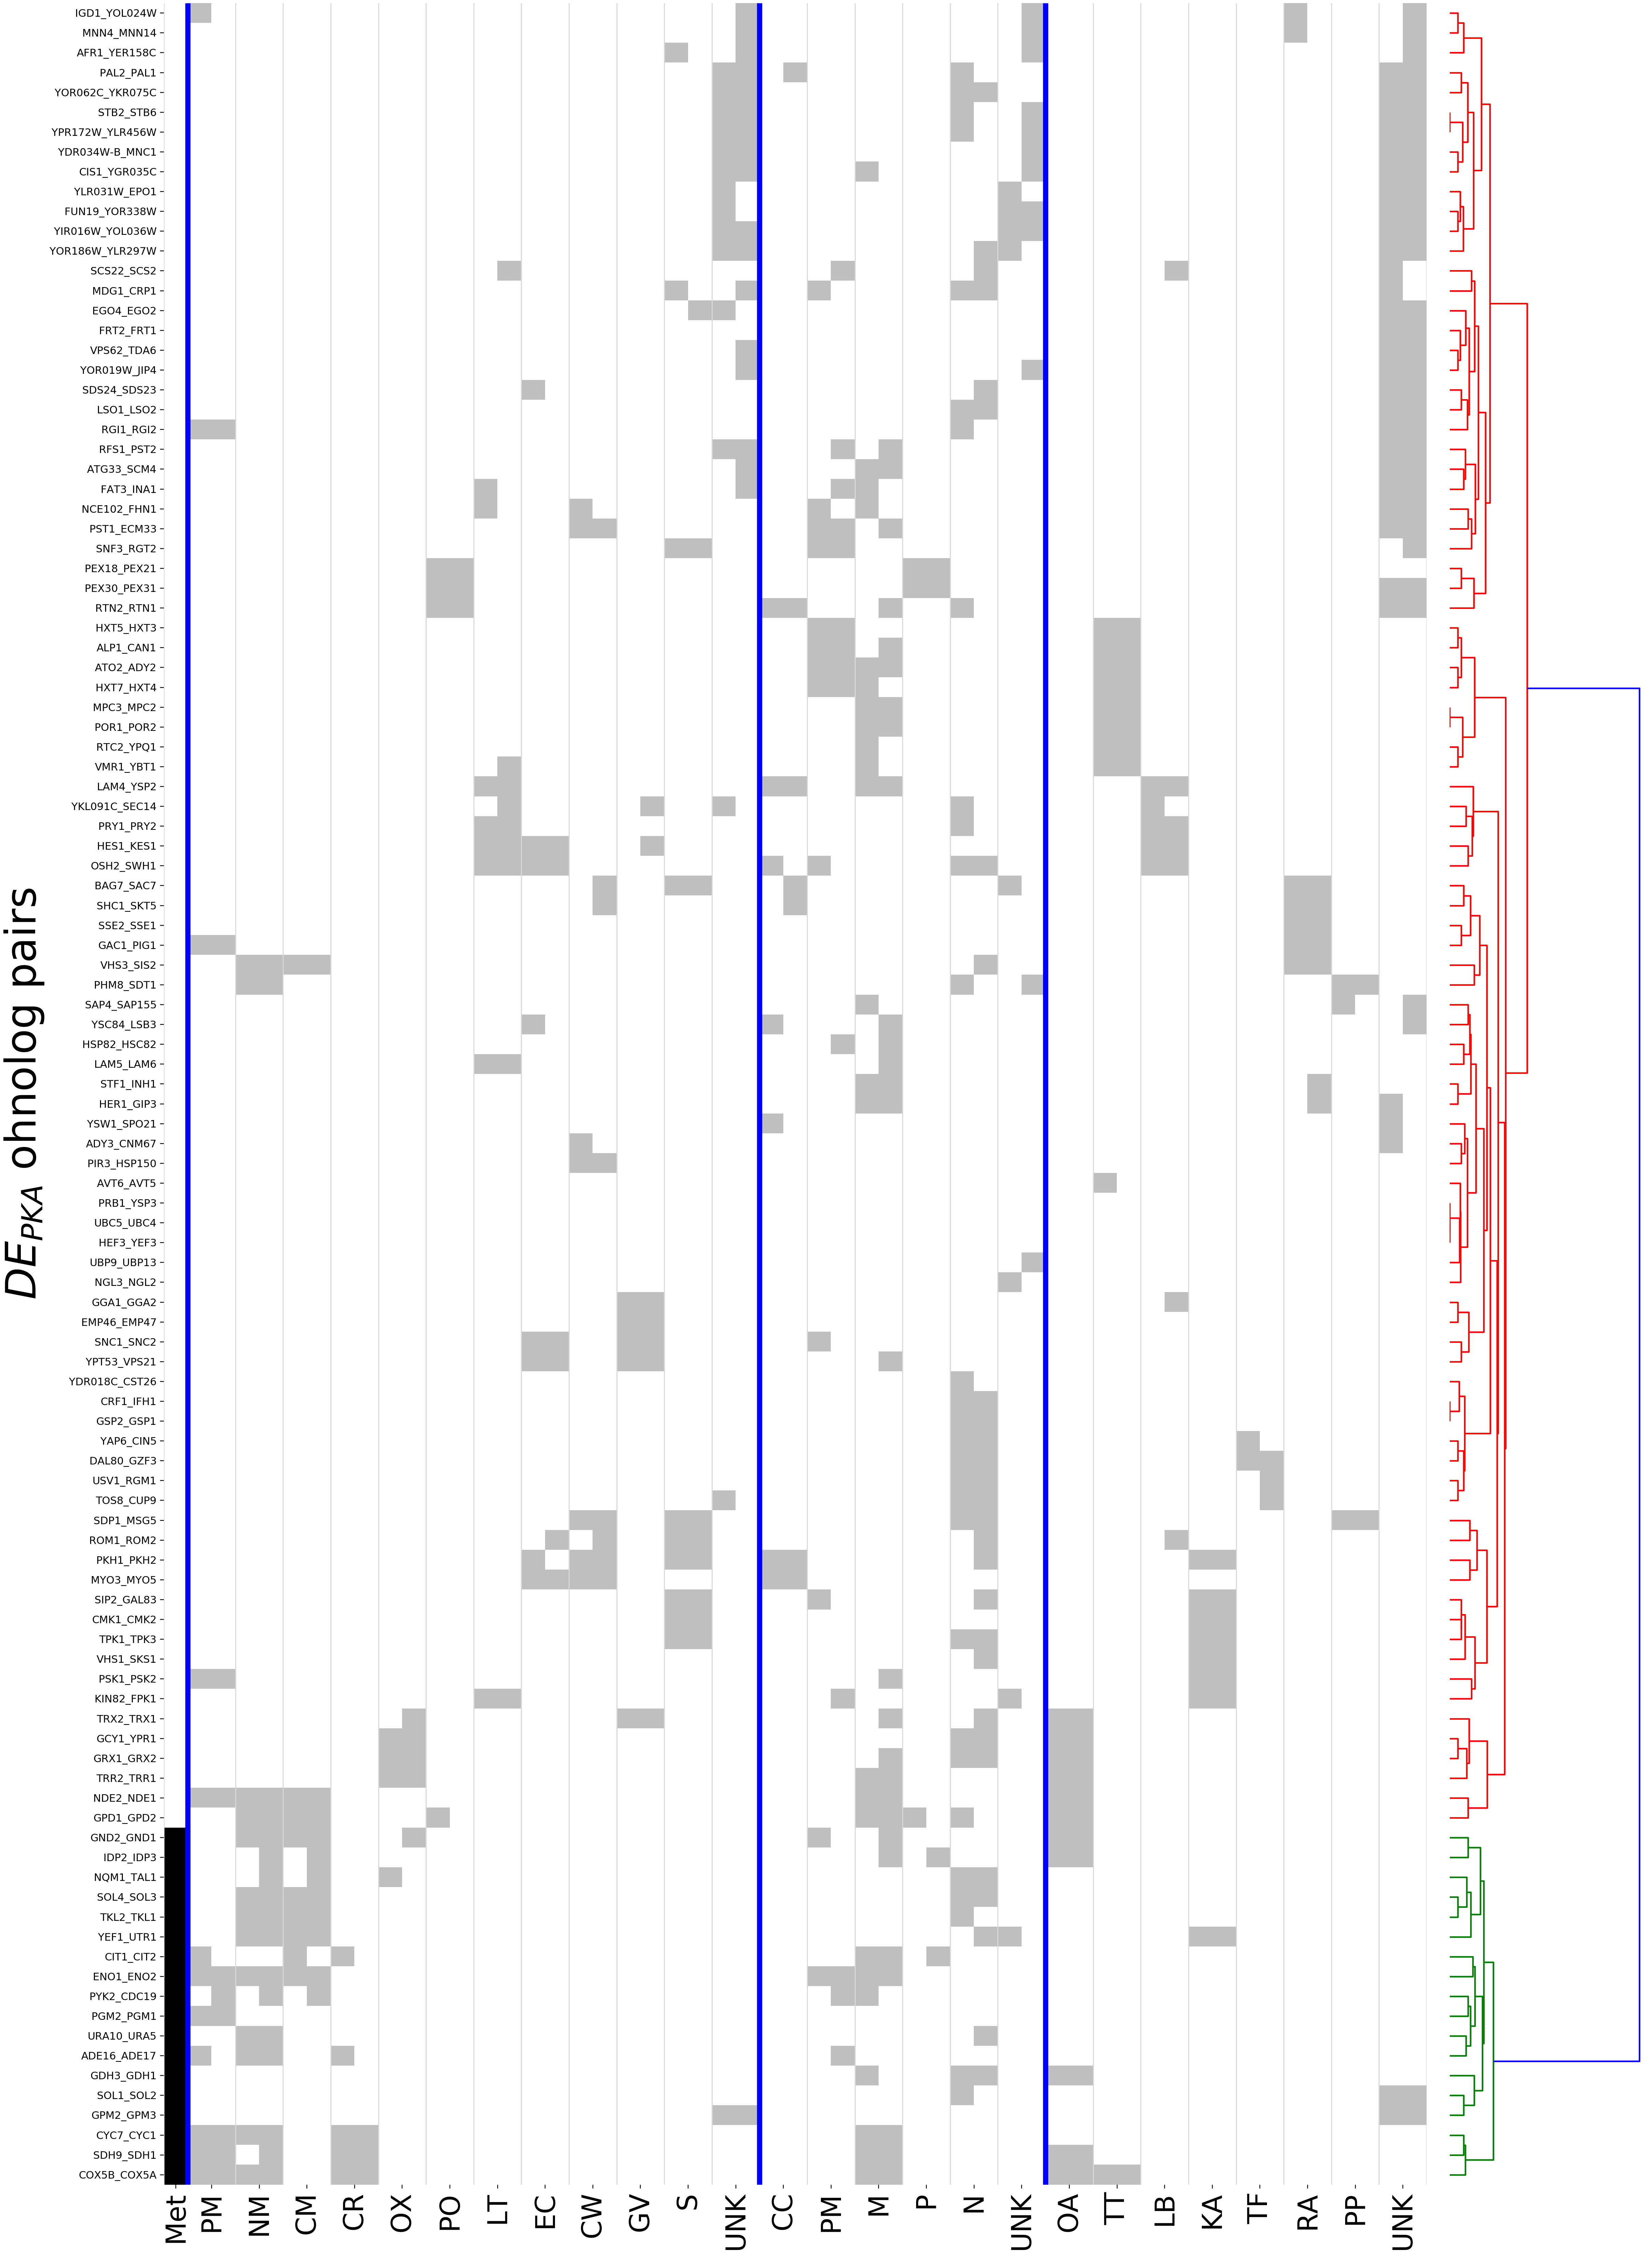

In [56]:
#Performs heirarchical clustering on row data
fig = plt.figure(constrained_layout=True, figsize=(22,30))
gs = fig.add_gridspec(1,2, width_ratios=[19,3] )
#fig_pct, axarr = plt.subplots(1,3, figsize=(10,20), gridspec_kw={'width_ratios': [1, 20,1]})
ax = fig.add_subplot(gs[0,0])
ax_dend = fig.add_subplot(gs[0,1])


# cols_to_cluster = []

# for term in chart_terms['P']: 
#     for level in ['high', 'low']: 
#         cols_to_cluster.append(term + ' ' + level)

# cols_to_cluster.append([])

#chart_df.loc[:,cols_to_cluster].values
dm = spd.pdist(chart_df, metric = 'euclidean') #'hamming' #yeast_esr_exp.euclidean_nan_filt looked a bit strange.  Maybe because of differing dimensions?
row_cluster = sch.linkage(dm, method='ward', optimal_ordering=True) #, 'median' optimal_ordering=True)  #'ward'  #might also try 'centroid', 'median', and 'ward'

#Makes clusters using fclust
#row_index = chart_df.index.tolist()

#T = sch.fcluster(row_cluster,5, criterion='maxclust') #1.153)  #11, criterion = 'maxclust')
#cluster_dict = {}
# ohnolog_cluster_dict = {}
# for kk in list(set(T)):
#     cluster = []
#     for jj,cnum in enumerate(T):
#         if cnum==kk:
#             cluster.append(row_index[jj])
#             ohnolog_cluster_dict[row_index[jj]]=cnum
#     cluster_dict[kk] = cluster
# cluster_dict

# #Plots dendrogram using row cluster:
# cmap = plt.get_cmap('tab20')
# cluster_colors = {clust : mpl_colors.to_hex(cmap(jj)) for jj, clust in enumerate(cluster_dict.keys())}

# cluster_color_func = {}

# for ohnolog_pair_key,cluster_no in enumerate(T):
#     cluster_color = cluster_colors[cluster_no]
#     cluster_color_func[ohnolog_pair_key] = cluster_color

# cluster_color_func
    
# # notes:
# # * rows in Z correspond to "inverted U" links that connect clusters
# # * rows are ordered by increasing distance
# # * if the colors of the connected clusters match, use that color for link
# #
# # Based on answer from https://stackoverflow.com/questions/38153829/custom-cluster-colors-of-scipy-dendrogram-in-python-link-color-func

# link_cols = {}
# dflt_col = "#808080"   # Unclustered gray
# for ind, linked_inds in enumerate(row_cluster[:,:2].astype(int)):
#     colors =[]
#     for jj,linked_ind in enumerate(linked_inds): 
#         if linked_ind > len(row_cluster): 
#             colors.append(link_cols[linked_ind])
#         else:
#             colors.append(cluster_color_func[linked_ind])
    
#     assert len(colors)==2 
#     if colors[0]==colors[1]:
#         link_cols[ind+1+len(row_cluster)] = colors[0] 
#     else: 
#         link_cols[ind+1+len(row_cluster)] = dflt_col
        
dendrogram = sch.dendrogram(Z=row_cluster, no_labels=True, orientation='right', ax=ax_dend) #count_sort='ascending',, link_color_func=lambda x: link_cols[x]), ax=ax_clust
ax_dend.set_frame_on(False)
ax_dend.set_xticks([])
# #dn1 = sch.dendrogram(row_cluster, ax=ax_clust, above_threshold_color='y', orientation='left')


#Reorders index to match dendrogram for heatmap
row_ind_reorder = dendrogram['leaves'].copy()
row_ind_reorder.reverse()

# #row_ind_reorder = sch.leaves_list(row_cluster)

old_rows = chart_df.index.tolist()
new_rows = [old_rows[ind] for ind in row_ind_reorder]

chart_df_clustered = chart_df.reindex(new_rows)


sns.heatmap(chart_df_clustered, cmap='binary', cbar = False, ax = ax, rasterized=True)

ymin = 0
ymax = len(chart_df_clustered)
ax.set_ylabel('$DE_{PKA}$ ohnolog pairs', {"fontsize": 40})
ax.vlines([0] + list(np.arange(1, 2*(sum(term_list_len)+2), 2)), ymin=ymin, ymax=ymax, colors = '#d9d9d9', linewidth=1)
ax.vlines([1] + [1+2*sum(term_list_len[0:jj]) for jj in [1,2]], ymin=ymin, ymax = ymax, colors = 'b', linewidth=5)
ax.set_xticks([0.5] + list(np.arange(2, 2*(sum(term_list_len)+1), 2)))
ax.set_xticklabels(term_labels, fontdict={"fontsize":26})

fig.savefig(figsave_dir + 'go_term_chart.svg')

   

In [ ]:
#visualize number of motif binding sites across ohnologs
#This makes the goi_counts dataframe

#reloads ohnologs_dePKA: 
ohnologs_dePKA = pd.read_csv(data_processing_dir + os.path.normpath("kl_sc_PKA_as_m24_r1g1_20181017/20200617_ohnologs_dePKA.csv"), index_col=0)


motif_name = 'STRE'# 'STRE_TATA'



fig = plt.figure(constrained_layout=True, figsize=(30,20))
gs = fig.add_gridspec(1,2, width_ratios=[3,27] )
#fig_pct, axarr = plt.subplots(1,3, figsize=(10,20), gridspec_kw={'width_ratios': [1, 20,1]})
ax_STRE = fig.add_subplot(gs[0,1])
ax_clust = fig.add_subplot(gs[0,0])



spec_sets_post_WGH = [('Post WGH high', 'high'),
             ('Post WGH low', 'low')]

#spec_order_post_WGH = ['Scer','Smik','Skud','Suva', 'Cgla', 'Kafr','Knag','Ndai','Ncas','Tbla','Tpha','Vpol']

goi_counts_post_WGH = pd.DataFrame(index=ohnologs_dePKA.index)

for spec_set_name, level in spec_sets_post_WGH: 

    for spec in spec_order_post_WGH:
        #add column with genenames for the species
        ancestor_to_genes_spec = ancestor_to_genes[spec_set_name][spec]
        spec_genenames = []
        for anc in goi_counts_post_WGH.index:
            spec_genenames.append(ancestor_to_genes_spec[anc])
        goi_counts_post_WGH[spec + '_genename_' + level] = spec_genenames

        prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
        col_to_merge = prom_data.loc[:,[motif_name+'_count']]
        col_to_merge.rename(columns={motif_name+'_count':spec+'_'+motif_name +'_count_' + level}, inplace=True)
        goi_counts_post_WGH = goi_counts_post_WGH.merge(col_to_merge, left_on=spec+'_genename_'+level, right_index=True, how = 'left')


#pre_wgh genes
spec_set_name = 'Pre WGH'

spec_order_pre_WGH = specs_ordered_fig2[1:]

goi_counts_pre_WGH = goi_pre_WGH_orths_lhfilt.loc[:,['Ancestor']]
for spec, genenames in chosen_orths.items():
    goi_counts_pre_WGH[spec + '_genename'] = genenames
    prom_data = motif_calcs[spec_set_name][spec]['DEpka'].prom_counts
    counts_column = prom_data.loc[:,[motif_name+'_count']].rename(columns={motif_name+'_count':spec + '_' + motif_name + '_count'})
    goi_counts_pre_WGH = goi_counts_pre_WGH.merge(counts_column, how='left', left_on=spec+'_genename', right_index=True)

    
goi_counts = goi_counts_pre_WGH.merge(goi_counts_post_WGH, how='left', left_on='Ancestor', right_index=True)

#Subset on promoters with at least one STRE in Scer high
#goi_counts_subset = goi_counts
goi_counts_subset = goi_counts[goi_counts['Scer_STRE_count_high']>0]

## Put dataframe in order to visualize as heatmap

# spec_order_ZT = ['Zygosaccharomyces_rouxii',
#  'Zygosaccharomyces_kombuchaensis',
#  'Zygosaccharomyces_bailii',
#  'Zygosaccharomyces_bisporus',
#  'Zygotorulaspora_mrakii',
#  'Zygotorulaspora_florentina',
#  'Torulaspora_microellipsoides',
#  'Torulaspora_maleeae',
#  'Torulaspora_delbrueckii',
#  'Torulaspora_pretoriensis',
#  'Torulaspora_franciscae']
 
# spec_order_KLE = ['Kluyveromyces_aestuarii',
#  'Kluyveromyces_marxianus',
#  'Kluyveromyces_dobzhanskii',
#  'Kluyveromyces_lactis',
#  'Eremothecium_sinecaudum',
#  'Eremothecium_coryli',
#  'Eremothecium_cymbalariae',
#  'Ashbya_aceri',
#  'Eremothecium_gossypii',
#  'Lachancea_kluyveri',
#  'Lachancea_cidri',
#  'Lachancea_fermentati',
#  'Lachancea_mirantina',
#  'Lachancea_waltii',
#  'Lachancea_thermotolerans',
#  'Lachancea_quebecensis',
#  'Lachancea_nothofagi',
#  'Lachancea_dasiensis',
#  'Lachancea_meyersii',
#  'Lachancea_lanzarotensis',
#  'Lachancea_fantastica_nom_nud']

# spec_order_outgroups = ['Hanseniaspora_vineae',
#  'Hanseniaspora_osmophila',
#  'Wickerhamomyces_anomalus',
#  'Cyberlindnera_jadinii',
#  'Ascoidea_rubescens',
#  'Komagataella_pastoris',
#  'Debaryomyces_hansenii',
#  'Candida_albicans',
#  'Metschnikowia_hawaiiensis']


spec_sets = [('ZT','Pre WGH', spec_order_ZT, ''),
             ('low','Post WGH high', spec_order_post_WGH, '_high'), 
             ('high','Post WGH low', spec_order_post_WGH, '_low'),  
             ('KLE_og','Pre WGH', spec_order_KLE + spec_order_outgroups, '')]



#Make labels for each species 
columns_to_show = []
label_order = []
for spec_set_name, pre_post_WGH, spec_set, level_suffix in spec_sets:
    for spec in spec_set: 
        if pre_post_WGH in {'Post WGH high','Post WGH low'}:
            spec_label = label_order_dict[spec]
        else:
            spec_label = spec
        columns_to_show.append(spec + '_' + motif_name + '_count' + level_suffix)
        label_order.append(spec_label + level_suffix)


goi_counts_only = goi_counts_subset.loc[:, columns_to_show]
        
#Select columns to use to cluster -only ZT and KLE branch
columns_for_cluster = []
for spec_set_name, pre_post_WGH, spec_set, level_suffix in [spec_sets[0], spec_sets[3]]:
    for spec in spec_set:     
        columns_for_cluster.append(spec + '_' + motif_name + '_count' + level_suffix)

goi_counts_to_cluster = goi_counts_subset.loc[:, columns_for_cluster]

#Performs heirarchical clustering on row data

dm = spd.pdist(goi_counts_to_cluster.values, metric = yeast_esr_exp.correlation_nan_filt) #yeast_esr_exp.euclidean_nan_filt looked a bit strange.  Maybe because of differing dimensions?
row_cluster = sch.linkage(dm, method='ward', optimal_ordering=True)    #might also try 'centroid', 'median', and 'ward'

#Makes clusters using fclust
row_index = goi_counts_only.index.tolist()
T = sch.fcluster(row_cluster,5, criterion='maxclust') #1.153)  #11, criterion = 'maxclust')
cluster_dict = {}
ohnolog_cluster_dict = {}
for kk in list(set(T)):
    cluster = []
    for jj,cnum in enumerate(T):
        if cnum==kk:
            cluster.append(row_index[jj])
            ohnolog_cluster_dict[row_index[jj]]=cnum
    cluster_dict[kk] = cluster
cluster_dict

#Plots dendrogram using row cluster:
cmap = plt.get_cmap('tab20')
cluster_colors = {clust : mpl_colors.to_hex(cmap(jj)) for jj, clust in enumerate(cluster_dict.keys())}

cluster_color_func = {}

for ohnolog_pair_key,cluster_no in enumerate(T):
    cluster_color = cluster_colors[cluster_no]
    cluster_color_func[ohnolog_pair_key] = cluster_color

cluster_color_func
    
# notes:
# * rows in Z correspond to "inverted U" links that connect clusters
# * rows are ordered by increasing distance
# * if the colors of the connected clusters match, use that color for link
#
# Based on answer from https://stackoverflow.com/questions/38153829/custom-cluster-colors-of-scipy-dendrogram-in-python-link-color-func

link_cols = {}
dflt_col = "#808080"   # Unclustered gray
for ind, linked_inds in enumerate(row_cluster[:,:2].astype(int)):
    colors =[]
    for jj,linked_ind in enumerate(linked_inds): 
        if linked_ind > len(row_cluster): 
            colors.append(link_cols[linked_ind])
        else:
            colors.append(cluster_color_func[linked_ind])
    
    assert len(colors)==2 
    if colors[0]==colors[1]:
        link_cols[ind+1+len(row_cluster)] = colors[0] 
    else: 
        link_cols[ind+1+len(row_cluster)] = dflt_col
        
dendrogram = sch.dendrogram(Z=row_cluster, ax = ax_clust, no_labels=True, orientation='left', link_color_func=lambda x: link_cols[x])
ax_clust.set_frame_on(False)
ax_clust.set_xticks([])
#dn1 = sch.dendrogram(row_cluster, ax=ax_clust, above_threshold_color='y', orientation='left')


#Reorders index to match dendrogram for heatmap
row_ind_reorder = dendrogram['leaves'].copy()
row_ind_reorder.reverse()

#row_ind_reorder = sch.leaves_list(row_cluster)

old_rows = goi_counts_only.index.tolist()
new_rows = [old_rows[ind] for ind in row_ind_reorder]

goi_counts_clustered = goi_counts_only.reindex(new_rows)




#Plot stre presence in promoters and legend

black_lines = []
yellow_lines = []
black_lines_set = {label_order_dict['Vpol']+ '_low', 'Torulaspora_franciscae','Lachancea_fantastica_nom_nud'}
yellow_lines_set = {label_order_dict['Vpol'] + '_high','Zygosaccharomyces_bisporus', 'Kluyveromyces_lactis', 'Eremothecium_gossypii'}

for jj,label in enumerate(label_order):
    if label in black_lines_set:
        black_lines.append(jj+1)
    elif label in yellow_lines_set:
        yellow_lines.append(jj+1)

#SEt colormap, make 0 light blue
vmax = 7
cmap = sns.light_palette("red",vmax)
cmap[0] = np.array([222.0/255.0, 238.0/255.0, 249/255.0, 1.0 ])  #Make the 0 color light blue

#sns.heatmap(goi_counts_clustered, vmax = vmax, ax=ax_STRE, cmap=cmap, cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8}) 
sns.heatmap(goi_counts_clustered, vmax = vmax, ax=ax_STRE, cmap=cmap, cbar_kws={'ticks':[val + 0.5 for val in range(vmax)],  'extend':'max', 'aspect':8}) 

#The last axes inthe figure is the colorbar (seaborne does this automatically)
cbar = fig.axes[2]
#cbar.set_ylabel('test', fontdict={"fontsize":40})
cbar.set_yticklabels([str(val) for val in range(vmax-1)] + ['>' + str(vmax-1)], fontdict={"fontsize":40})
ax_STRE.set_facecolor("grey")
ax_STRE.set_xticklabels(label_order, fontdict={"fontsize":14}, rotation =45, ha='right')
ax_STRE.set_ylabel('')
ax_STRE.set_title('Number of ' + motif_name + ' motifs in Promoter',fontdict={"fontsize":40})

#separate out pre/post WGH and post WGH high/low with yellow lines
#Make big lines for all major group breaks
ax_STRE.vlines(black_lines, ymin = 0, ymax = len(goi_counts_only), colors = 'black',linewidth=5)
ax_STRE.vlines(yellow_lines, ymin = 0, ymax = len(goi_counts_only), colors = 'yellow',linewidth=5)

#fig.savefig(figsave_dir + motif_name + '_conservation_all.svg',bbox_inches='tight')

   

   

In [60]:
#various gene sets
#genes = go_term_df_cutoff.loc["lipid metabolic process"]['genes common name']
#genes = ['XBP1','RME1','COX1','COX4','COX13','COX6','GSM1','COX12','CYT1']
#genes =  ['BAS1', 'MET32', 'GZF3','GLN3', 'MET28', 'MET4', 'GAT1'] #Purine Metabolism
#genes = ['ADE1','ADE2','ADE4','ADE5','ADE6','ADE7','ADE8','ADE12','ADE13','ADE16']  #Purine Genes
#genes = ['ZWF1','HIS4','SFP1']


In [50]:
# terms_of_interest = ["lipid metabolic process","biological_process","conjugation","response to chemical",
#                      "sporulation","endosomal transport","lipid transport","response to oxidative stress",
#                      "cellular respiration","cofactor metabolic process","carbohydrate transport",
#                      "mitochondrial translation", "mitochondrion organization","translational initiation",
#                      "cellular amino acid metabolic process", "cell budding",
#                      "nucleobase containing small molecule metabolic process", "snoRNA processing", "amino acid transport"]

# term_df_dict = {}
# for term in terms_of_interest:
#     term_genes = list(go_slims_aspect[go_slims_aspect['GO_term']==term]['sc_genename'])
#     kl_sc_PKA_data_term = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(term_genes)]
#     term_df_dict[term]=kl_sc_PKA_data_term

# kl_sc_sig_unsig_dict = {'Unsig KL and SC' : kl_sc_PKA_data_unsig, 
#                  'Sig KL only': kl_sc_PKA_data_klsig_scunsig, 
#                  'Sig SC only': kl_sc_PKA_data_scsig_klunsig, 
#                  'Sig KL and SC': kl_sc_PKA_data_klscsig}

# condition_set = {}
# for df_dict in (term_df_dict,kl_sc_sig_unsig_dict): 
#     condition_set.update(df_dict)



In [61]:
# #Plot a particular set of go terms on top of my scatter plot

# #plot figure in plot.ly
# # condition_set = {'Unsig KL and SC' : kl_sc_PKA_data_unsig, 
# #                  'Sig KL only': kl_sc_PKA_data_klsig_scunsig, 
# #                  'Sig SC only': kl_sc_PKA_data_scsig_klunsig, 
# #                  'Sig KL and SC': kl_sc_PKA_data_klscsig,
# #                  term: kl_sc_PKA_data_term }

# fig_data = [
#   		{
#   			'x': condition_set[condition]['PKA(AS)+1NMPP1_KL'], 
#         	'y': condition_set[condition]['PKA(AS)+1NMPP1_SC'], 
#         	'text': condition_set[condition]['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': condition} for condition in condition_set.keys()]
# fig = {
#     'data': fig_data,
#     'layout': {
#         'xaxis': {'title': 'KL LFC 4uM NMPP1'},
#         'yaxis': {'title': 'SC LFC 4uM NMPP1'}
#     }
# }

# # IPython notebook
# # py.iplot(fig, filename='pandas/multiple-scatter')

# py.iplot(fig, filename='sc_kl_scatter_sig_highlight_20170915_various_goterms')


# #use inline plotly. 

In [213]:
#Generate a list of all genes in KL_SC_PKA_data and add as a list in intermine named
#20170905_kl_sc_PKA_data_genes 
#We can then make subsets programmatically using the API

#I ran this command: 
#" ".join(kl_sc_PKA_data['sc_genename'])

#Then copied and pasted the output into the yeastmine build query list. 

#The following items were not found in SGD: 
#Scer_YGOB_YDR134C Scer_RDN18-1 Scer_YGOB_SDC25 Scer_RDN25-1 Scer_RDN58-1 Scer_YGOB_Anc_7.495 Scer_YGOB_ADL119W Scer_RDN5-1

#I wonder if I could do this just using something like this: query.add_constraint("Gene", "LOOKUP", ["YNL323W","YIL093C",...])



In [62]:
# mitophagy_list = ['YCR079W','YDL113C','YFR021W','YGR049W','YIL146C','YJL036W','YLL042C','YLR423C','YNL223W','YNR007C']
# mito_disassembly_list = ['YCR079W','YDL113C','YFR021W','YGR049W','YIL146C','YJL036W','YLL042C','YLR423C','YNL223W','YNR007C']
# lipid_catabolic_list = ['YAL051W','YCR068W','YDR036C','YDR058C','YGL010W','YKR009C','YKR089C','YMR008C','YMR313C','YOL011W','YOR059C','YOR081C','YOR084W','YOR363C','YPR001W','YPR002W','YPR006C']
# #kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(lipid_catabolic_list)]

In [63]:
# #Generate Query for all kl_sc_PKA_data genes

# # Get a new query on the class (table) you will be querying:
# query_all = service.new_query("Gene")

# # The view specifies the output columns
# query_all.add_view(
#     "primaryIdentifier", "secondaryIdentifier", "organism.shortName", "symbol",
#     "name"
# )

# # You can edit the constraint values below
# query_all.add_constraint("Gene", "IN", "20170509_kl_sc_PKA_data_genes", code = "A")

# # Uncomment and edit the code below to specify your own custom logic:
# # query.set_logic("A")

# #gene_id_list = [str(row["id"] for row in query.rows()]

# #type(gene_id_list[0])

# # query_list = list(query)

# # for row in query_list:     #query.rows():
# #     print(row["primaryIdentifier"], row["secondaryIdentifier"], row["organism.shortName"], \
# #         row["symbol"], row["name"], row["id"])

In [64]:
# # Yeastmine queries for each geneset
# #For each set of genes
# # gene_sets = [('klsig','act'),
# #             ('scsig','act'),
# #             ('klscsig','act'),
# #             ('klsig','rep'),
# #             ('scsig','rep'),
# #             ('klscsig','rep')]

# #Add in the one gene that is significant for both but repressed in SC and activated in KL. 
# klsig_act_genes = list(kl_sc_PKA_data_klsig_scunsig[kl_sc_PKA_data_klsig_scunsig['PKA(AS)+1NMPP1_KL']>0]['sc_genename'])
# klsig_act_genes.append('YJL208C')

# #Add in the one gene that is significant for both but activated in SC and repressed in KL.
# klsig_rep_genes = list(kl_sc_PKA_data_klsig_scunsig[kl_sc_PKA_data_klsig_scunsig['PKA(AS)+1NMPP1_KL']<0]['sc_genename'])
# klsig_rep_genes.append('YNL014W')

# #Add in the one gene that is significant for both but activated in SC and repressed in KL.
# scsig_act_genes = list(kl_sc_PKA_data_scsig_klunsig[kl_sc_PKA_data_scsig_klunsig['PKA(AS)+1NMPP1_SC']>0]['sc_genename'])
# scsig_act_genes.append('YNL014W')

# #Add in the one gene that is significant for both but repressed in SC and activated in KL. 
# scsig_rep_genes = list(kl_sc_PKA_data_scsig_klunsig[kl_sc_PKA_data_scsig_klunsig['PKA(AS)+1NMPP1_SC']<0]['sc_genename'])
# scsig_rep_genes.append('YJL208C')

# gene_sets = ['klsig_act', 'klsig_rep','scsig_act','scsig_rep','klscsig_act','klscsig_rep']

# gene_set_dict = {'klsig_act': klsig_act_genes,
#                  'klsig_rep': klsig_rep_genes,
#                  'scsig_act': scsig_act_genes,
#                  'scsig_rep': scsig_rep_genes,
#                  'klscsig_act': list(kl_sc_PKA_data_klscsig[(kl_sc_PKA_data_klscsig['PKA(AS)+1NMPP1_SC']>0) & (kl_sc_PKA_data_klscsig['PKA(AS)+1NMPP1_KL']>0)]['sc_genename']),
#                  'klscsig_rep': list(kl_sc_PKA_data_klscsig[(kl_sc_PKA_data_klscsig['PKA(AS)+1NMPP1_SC']<0) & (kl_sc_PKA_data_klscsig['PKA(AS)+1NMPP1_KL']<0)]['sc_genename'])
#                 }

# missing_genes = ['Scer_YGOB_YDR134C', 'Scer_RDN18-1', 
#                  'Scer_YGOB_SDC25', 'Scer_RDN25-1', 
#                  'Scer_RDN58-1', 'Scer_YGOB_Anc_7.495', 
#                  'Scer_YGOB_ADL119W', 'Scer_RDN5-1']

# pval_cutoff = 0.01

# for gene_set in gene_sets: 
#     print(gene_set)
#     gene_set_list = gene_set_dict[gene_set]
    
#     #filter out missing genes 
#     print("The following missing genes are filtered out:")
#     print(set(gene_set_list) & set(missing_genes))
#     gene_set_list_filtered = list(set(gene_set_list)-set(missing_genes))
#     new_query = query_all.clone()
    
#     #subset query based on desired gene set
#     new_query.add_constraint("Gene.secondaryIdentifier", "ONE OF", gene_set_list_filtered)
    
#     #Generate a list
#     new_list = service.create_list(new_query.select('Gene.id'), "Gene", name = "20170905" + gene_set)
    
#     #Run Go enrichment on the list
#     results = new_list.calculate_enrichment('go_enrichment_for_gene')
#     results_list = list(results)    
#     for result in results_list: 
#         print(result)
#         if result['p-value']<pval_cutoff:
#             print(result)
#             print(result)
            
#     #Given a P-value cutoff
#     # Save the go term 
#     # Save the contingency table
#     # Save the related genes

# ##To see a list of widgets that are available
# service.widgets 

#results = new_list.calculate_enrichment('go_enrichment_for_gene')


In [ ]:
# #Get genes from a go term.  

# from intermine.webservice import Service
# service = Service("http://yeastmine.yeastgenome.org:443/yeastmine/service")
# query = service.new_query("Gene")
# query.add_view(
#     "primaryIdentifier", "secondaryIdentifier", "symbol", "featureType",
#     "goAnnotation.qualifier", "goAnnotation.ontologyTerm.identifier",
#     "goAnnotation.ontologyTerm.name", "goAnnotation.ontologyTerm.namespace",
#     "goAnnotation.evidence.code.code", "goAnnotation.evidence.code.withText",
#     "goAnnotation.evidence.code.annotType",
#     "goAnnotation.evidence.publications.pubMedId",
#     "goAnnotation.evidence.publications.citation"
# )
# query.add_sort_order("Gene.secondaryIdentifier", "ASC")
# query.add_constraint("goAnnotation.ontologyTerm", "LOOKUP", "GO:0000182", code = "A")

# for row in query.rows():
#     print row["primaryIdentifier"], row["secondaryIdentifier"], row["symbol"], row["featureType"], \
#         row["goAnnotation.qualifier"], row["goAnnotation.ontologyTerm.identifier"], \
#         row["goAnnotation.ontologyTerm.name"], row["goAnnotation.ontologyTerm.namespace"], \
#         row["goAnnotation.evidence.code.code"], row["goAnnotation.evidence.code.withText"], \
#         row["goAnnotation.evidence.code.annotType"], \
#         row["goAnnotation.evidence.publications.pubMedId"], \
#         row["goAnnotation.evidence.publications.citation"]

In [7]:
# #See which genes correspond to JSO targets. 
# jso_msn2_targets = ['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3', 'PGM2']


In [65]:
# gene_set_data = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]
# gene_set_list = gene_set_data['sc_genename']


# go_term_data = []

# go_term_index = []

# for term in go_term_list: 
#     term_genes = list(go_slims_aspect[go_slims_aspect['GO_term']==term]['sc_genename'])
#     if len(term_genes)> len(set(term_genes)):
#         print("Duplicate Term: " + term)
#     subset_genes_in_goterm =  set(gene_set_list) & set(term_genes)
#     N_subset_genes_in_goterm = len(subset_genes_in_goterm)
#     N_genes_in_goterm = len(term_genes)
#     if N_subset_genes_in_goterm >0:
#         subset_genes_in_goterm_commonname = io_library.SC_common_name_lookup(subset_genes_in_goterm)
#         go_term_data.append((N_subset_genes_in_goterm,
#                              subset_genes_in_goterm,
#                              subset_genes_in_goterm_commonname,
#                              N_genes_in_goterm))
#         go_term_index.append(term)

# go_term_df = pd.DataFrame(go_term_data, index = go_term_index,columns = ['N subset genes in goterm',
#                                                                             'genes',
#                                                                             'genes common name',
#                                                                             'N genes in goterm'])
# go_term_df[['genes common name','N genes in goterm']]